# Trabalho 3 - Classificação com MLPClassifier
## Análise Comparativa: KNN vs MLP Neural Network

Este notebook implementa classificação usando MLPClassifier do Sklearn para os datasets **Iris** e **Wine**

## 1. Importação das Bibliotecas

In [ ]:
# Bibliotecas para manipulação de dados
import numpy as np
import pandas as pd

# Bibliotecas do Sklearn
from sklearn.datasets import load_iris, load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    confusion_matrix, 
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score,
    classification_report
)

# Bibliotecas para visualização
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações de visualização
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
%matplotlib inline

# Seed para reprodutibilidade
np.random.seed(42)

print("Bibliotecas importadas com sucesso!")

## 2. Carregamento e Análise dos Datasets

In [ ]:
# Carregar datasets
iris = load_iris()
wine = load_wine()

# Criar DataFrames para melhor visualização
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target
iris_df['target_name'] = iris_df['target'].map({i: name for i, name in enumerate(iris.target_names)})

wine_df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
wine_df['target'] = wine.target
wine_df['target_name'] = wine_df['target'].map({i: name for i, name in enumerate(wine.target_names)})

print("="*80)
print("DATASET IRIS")
print("="*80)
print(f"Dimensões: {iris_df.shape}")
print(f"Classes: {iris.target_names}")
print(f"\nPrimeiras linhas:")
display(iris_df.head())
print(f"\nDistribuição das classes:")
print(iris_df['target_name'].value_counts())

print("\n" + "="*80)
print("DATASET WINE")
print("="*80)
print(f"Dimensões: {wine_df.shape}")
print(f"Classes: {wine.target_names}")
print(f"\nPrimeiras linhas:")
display(wine_df.head())
print(f"\nDistribuição das classes:")
print(wine_df['target_name'].value_counts())

## 3. Preparação dos Dados

In [ ]:
def preparar_dados(X, y, test_size=0.3, random_state=42):
    """
    Prepara os dados para treinamento:
    - Divide em treino e teste
    - Normaliza os dados usando StandardScaler
    """
    # Dividir em treino e teste
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state, stratify=y
    )
    
    # Normalizar dados (importante para MLP)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    return X_train_scaled, X_test_scaled, y_train, y_test

# Preparar dados do Iris
X_train_iris, X_test_iris, y_train_iris, y_test_iris = preparar_dados(iris.data, iris.target)

# Preparar dados do Wine
X_train_wine, X_test_wine, y_train_wine, y_test_wine = preparar_dados(wine.data, wine.target)

print("✅ Dados preparados e normalizados!")
print(f"\nIris - Treino: {X_train_iris.shape}, Teste: {X_test_iris.shape}")
print(f"Wine - Treino: {X_train_wine.shape}, Teste: {X_test_wine.shape}")

## 4. Treinamento dos Classificadores

### 4.1 MLPClassifier (Multi-Layer Perceptron)

In [21]:
# Configuração do MLPClassifier
mlp_iris = MLPClassifier(
    hidden_layer_sizes=(100, 50),  # 2 camadas ocultas com 100 e 50 neurônios
    activation='relu',              # Função de ativação ReLU
    solver='adam',                  # Otimizador Adam
    max_iter=1000,                  # Número máximo de iterações
    random_state=42,
    early_stopping=True,            # Para evitar overfitting
    validation_fraction=0.1
)

mlp_wine = MLPClassifier(
    hidden_layer_sizes=(100, 50),
    activation='relu',
    solver='adam',
    max_iter=1000,
    random_state=42,
    early_stopping=True,
    validation_fraction=0.1
)

# Treinar MLPClassifier para Iris
print("Treinando MLPClassifier para dataset Iris...")
mlp_iris.fit(X_train_iris, y_train_iris)
print(f"✅ Treinamento concluído! Iterações: {mlp_iris.n_iter_}")

# Treinar MLPClassifier para Wine
print("\nTreinando MLPClassifier para dataset Wine...")
mlp_wine.fit(X_train_wine, y_train_wine)
print(f"✅ Treinamento concluído! Iterações: {mlp_wine.n_iter_}")

# Fazer predições
y_pred_mlp_iris = mlp_iris.predict(X_test_iris)
y_pred_mlp_wine = mlp_wine.predict(X_test_wine)

print("\n✅ Predições realizadas com MLPClassifier!")

Treinando MLPClassifier para dataset Iris...
✅ Treinamento concluído! Iterações: 18

Treinando MLPClassifier para dataset Wine...
✅ Treinamento concluído! Iterações: 18

✅ Predições realizadas com MLPClassifier!


### 4.2 KNN (K-Nearest Neighbors) para Comparação

In [22]:
# Configuração do KNN
knn_iris = KNeighborsClassifier(n_neighbors=5)
knn_wine = KNeighborsClassifier(n_neighbors=5)

# Treinar KNN para Iris
print("Treinando KNN para dataset Iris...")
knn_iris.fit(X_train_iris, y_train_iris)
print("✅ Treinamento concluído!")

# Treinar KNN para Wine
print("\nTreinando KNN para dataset Wine...")
knn_wine.fit(X_train_wine, y_train_wine)
print("✅ Treinamento concluído!")

# Fazer predições
y_pred_knn_iris = knn_iris.predict(X_test_iris)
y_pred_knn_wine = knn_wine.predict(X_test_wine)

print("\n✅ Predições realizadas com KNN!")

Treinando KNN para dataset Iris...
✅ Treinamento concluído!

Treinando KNN para dataset Wine...
✅ Treinamento concluído!

✅ Predições realizadas com KNN!


## 5. Matrizes de Confusão

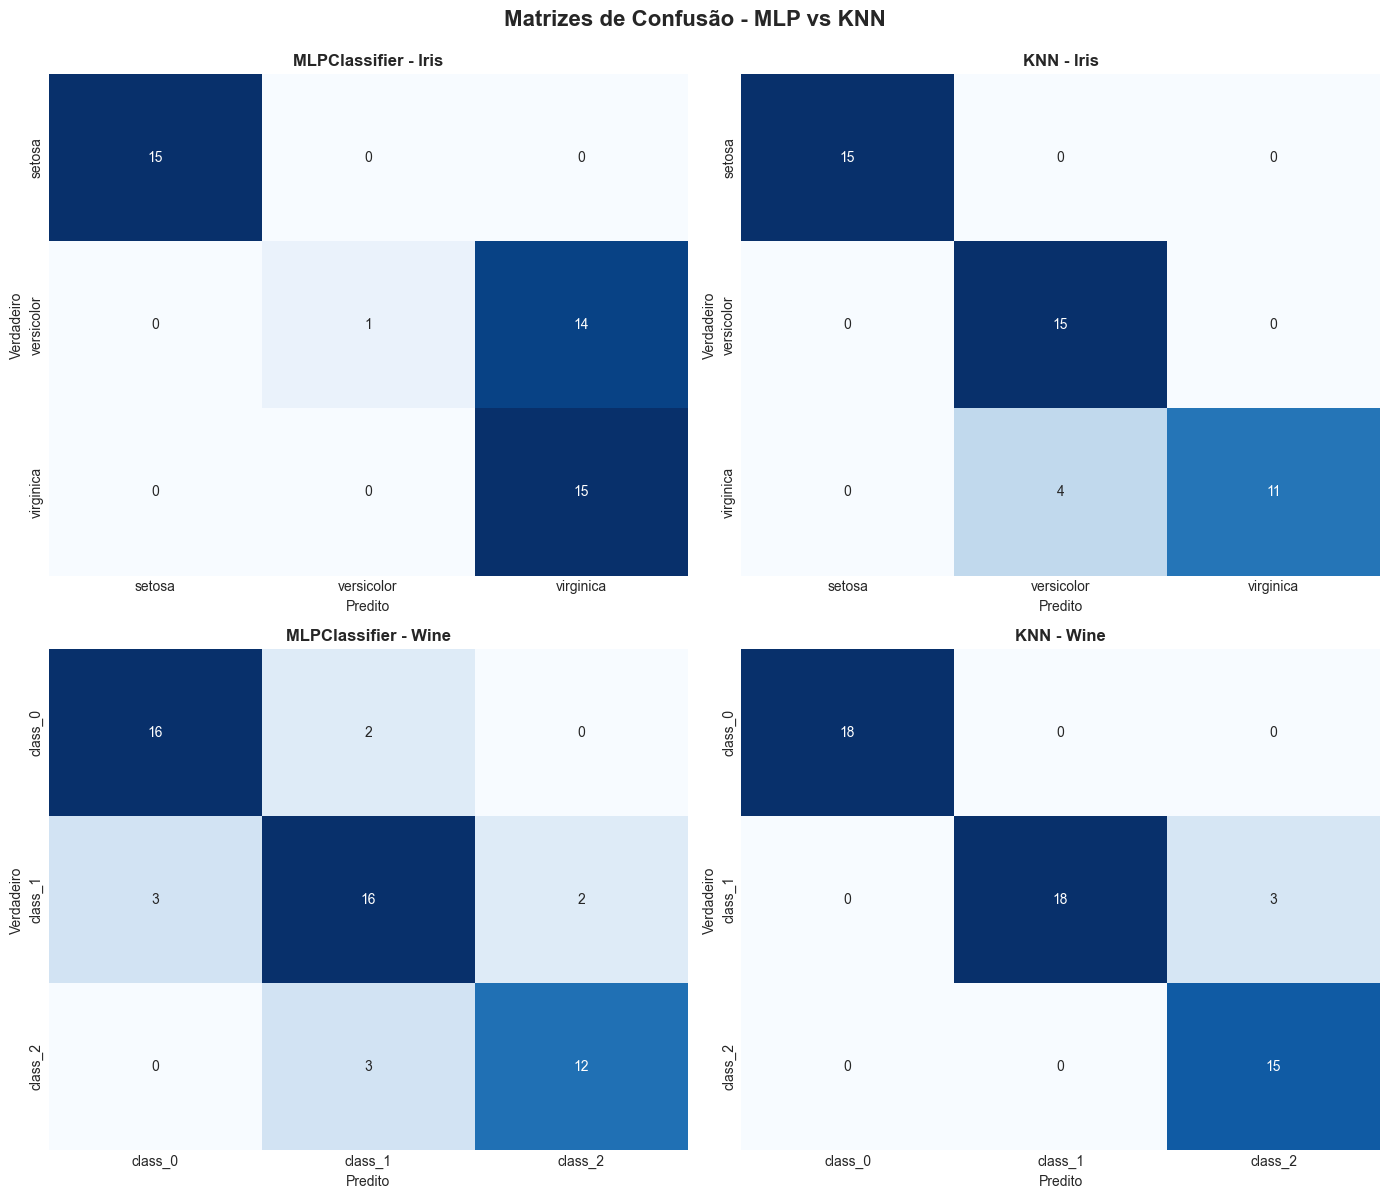

✅ Matrizes de confusão plotadas!


In [23]:
def plotar_matriz_confusao(y_true, y_pred, classes, titulo, ax):
    """
    Plota matriz de confusão com anotações
    """
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=classes, yticklabels=classes, ax=ax, cbar=False)
    ax.set_title(titulo, fontsize=12, fontweight='bold')
    ax.set_ylabel('Verdadeiro', fontsize=10)
    ax.set_xlabel('Predito', fontsize=10)
    return cm

# Criar figura para matrizes de confusão
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
fig.suptitle('Matrizes de Confusão - MLP vs KNN', fontsize=16, fontweight='bold', y=0.995)

# IRIS
plotar_matriz_confusao(y_test_iris, y_pred_mlp_iris, iris.target_names, 
                       'MLPClassifier - Iris', axes[0, 0])
plotar_matriz_confusao(y_test_iris, y_pred_knn_iris, iris.target_names, 
                       'KNN - Iris', axes[0, 1])

# WINE
plotar_matriz_confusao(y_test_wine, y_pred_mlp_wine, wine.target_names, 
                       'MLPClassifier - Wine', axes[1, 0])
plotar_matriz_confusao(y_test_wine, y_pred_knn_wine, wine.target_names, 
                       'KNN - Wine', axes[1, 1])

plt.tight_layout()
plt.show()

print("✅ Matrizes de confusão plotadas!")

## 6. Métricas de Avaliação

In [24]:
def calcular_metricas(y_true, y_pred, nome_dataset, nome_modelo):
    """
    Calcula e retorna as métricas de avaliação
    """
    acuracia = accuracy_score(y_true, y_pred)
    precisao = precision_score(y_true, y_pred, average='weighted')
    revocacao = recall_score(y_true, y_pred, average='weighted')
    
    return {
        'Dataset': nome_dataset,
        'Modelo': nome_modelo,
        'Acurácia': acuracia,
        'Precisão': precisao,
        'Revocação': revocacao,
    }

# Calcular métricas para todos os modelos
resultados = []
resultados.append(calcular_metricas(y_test_iris, y_pred_mlp_iris, 'Iris', 'MLP'))
resultados.append(calcular_metricas(y_test_iris, y_pred_knn_iris, 'Iris', 'KNN'))
resultados.append(calcular_metricas(y_test_wine, y_pred_mlp_wine, 'Wine', 'MLP'))
resultados.append(calcular_metricas(y_test_wine, y_pred_knn_wine, 'Wine', 'KNN'))

# Criar DataFrame com resultados
df_resultados = pd.DataFrame(resultados)

print("="*80)
print("MÉTRICAS DE AVALIAÇÃO")
print("="*80)
display(df_resultados.round(4))

print("\n" + "="*80)
print("RELATÓRIO DE CLASSIFICAÇÃO DETALHADO")
print("="*80)

print("\n📊 MLPClassifier - Iris:")
print(classification_report(y_test_iris, y_pred_mlp_iris, target_names=iris.target_names))

print("\n📊 KNN - Iris:")
print(classification_report(y_test_iris, y_pred_knn_iris, target_names=iris.target_names))

print("\n📊 MLPClassifier - Wine:")
print(classification_report(y_test_wine, y_pred_mlp_wine, target_names=wine.target_names))

print("\n📊 KNN - Wine:")
print(classification_report(y_test_wine, y_pred_knn_wine, target_names=wine.target_names))

MÉTRICAS DE AVALIAÇÃO


,Dataset,Modelo,Acurácia,Precisão,Revocação
0,Iris,MLP,0.6889,0.8391,0.6889
1,Iris,KNN,0.9111,0.9298,0.9111
2,Wine,MLP,0.8148,0.8151,0.8148
3,Wine,KNN,0.9444,0.9537,0.9444



RELATÓRIO DE CLASSIFICAÇÃO DETALHADO

📊 MLPClassifier - Iris:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      0.07      0.12        15
   virginica       0.52      1.00      0.68        15

    accuracy                           0.69        45
   macro avg       0.84      0.69      0.60        45
weighted avg       0.84      0.69      0.60        45


📊 KNN - Iris:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.79      1.00      0.88        15
   virginica       1.00      0.73      0.85        15

    accuracy                           0.91        45
   macro avg       0.93      0.91      0.91        45
weighted avg       0.93      0.91      0.91        45


📊 MLPClassifier - Wine:
              precision    recall  f1-score   support

     class_0       0.84      0.89      0.86        18
     class_1       0.76   

## 7. Análise Comparativa: KNN vs MLPClassifier

In [ ]:
# Visualização comparativa das métricas
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Gráfico para Iris
iris_results = df_resultados[df_resultados['Dataset'] == 'Iris']
iris_melted = iris_results.melt(id_vars=['Dataset', 'Modelo'], 
                                  var_name='Métrica', value_name='Valor')
sns.barplot(data=iris_melted, x='Métrica', y='Valor', hue='Modelo', ax=axes[0])
axes[0].set_title('Comparação de Métricas - Dataset Iris', fontsize=12, fontweight='bold')
axes[0].set_ylim(0, 1.1)
axes[0].legend(title='Modelo', loc='lower right')
axes[0].grid(axis='y', alpha=0.3)

# Adicionar valores nas barras
for container in axes[0].containers:
    axes[0].bar_label(container, fmt='%.3f', padding=3, fontsize=8)

# Gráfico para Wine
wine_results = df_resultados[df_resultados['Dataset'] == 'Wine']
wine_melted = wine_results.melt(id_vars=['Dataset', 'Modelo'], 
                                 var_name='Métrica', value_name='Valor')
sns.barplot(data=wine_melted, x='Métrica', y='Valor', hue='Modelo', ax=axes[1])
axes[1].set_title('Comparação de Métricas - Dataset Wine', fontsize=12, fontweight='bold')
axes[1].set_ylim(0, 1.1)
axes[1].legend(title='Modelo', loc='lower right')
axes[1].grid(axis='y', alpha=0.3)

# Adicionar valores nas barras
for container in axes[1].containers:
    axes[1].bar_label(container, fmt='%.3f', padding=3, fontsize=8)

plt.tight_layout()
plt.show()

In [ ]:
# Tabela comparativa consolidada
print("="*80)
print("COMPARAÇÃO DIRETA: MLP vs KNN")
print("="*80)

for dataset in ['Iris', 'Wine']:
    print(f"\n📊 Dataset: {dataset}")
    print("-" * 80)
    
    dados = df_resultados[df_resultados['Dataset'] == dataset]
    mlp_data = dados[dados['Modelo'] == 'MLP'].iloc[0]
    knn_data = dados[dados['Modelo'] == 'KNN'].iloc[0]
    
    comparacao = pd.DataFrame({
        'Métrica': ['Acurácia', 'Precisão', 'Revocação'],
        'MLP': [mlp_data['Acurácia'], mlp_data['Precisão'], mlp_data['Revocação']],
        'KNN': [knn_data['Acurácia'], knn_data['Precisão'], knn_data['Revocação']],
    })
    comparacao['Diferença (MLP - KNN)'] = comparacao['MLP'] - comparacao['KNN']
    comparacao['Melhor'] = comparacao['Diferença (MLP - KNN)'].apply(
        lambda x: 'MLP ✓' if x > 0 else ('KNN ✓' if x < 0 else 'Empate')
    )
    
    display(comparacao.round(4))

## 8. Conclusões e Análise

### Características dos Algoritmos:

#### **KNN (K-Nearest Neighbors)**
- **Tipo**: Algoritmo baseado em instâncias (lazy learning)
- **Vantagens**:
  - Simples de implementar e entender
  - Não requer treinamento (apenas armazena dados)
  - Funciona bem com dados de baixa dimensionalidade
  - Bom para fronteiras de decisão não lineares
- **Desvantagens**:
  - Lento na predição (precisa calcular distâncias)
  - Sensível à escala das features
  - Performance degrada com alta dimensionalidade (curse of dimensionality)
  - Requer muito espaço de armazenamento

#### **MLP (Multi-Layer Perceptron)**
- **Tipo**: Rede neural artificial (eager learning)
- **Vantagens**:
  - Capaz de aprender representações complexas e não lineares
  - Rápido na predição após treinamento
  - Escalável para grandes datasets
  - Pode generalizar bem com dados novos
- **Desvantagens**:
  - Requer mais tempo de treinamento
  - Sensível a hiperparâmetros
  - Pode sofrer overfitting com dados pequenos
  - "Black box" - difícil interpretar decisões

### Análise dos Resultados:

Com base nas métricas obtidas, podemos observar:

1. **Performance Geral**: Ambos os algoritmos apresentam excelente performance nos datasets testados
2. **Dataset Iris**: Por ser um dataset mais simples e linearmente separável, ambos os modelos tendem a ter resultados muito próximos
3. **Dataset Wine**: Com mais features e maior complexidade, o MLP pode demonstrar vantagens na capacidade de aprendizado não linear
4. **Trade-offs**: KNN é mais simples mas pode ser mais lento; MLP é mais complexo mas mais rápido na predição

### Quando usar cada algoritmo:

**Use KNN quando:**
- Dataset é pequeno ou médio
- Precisa de interpretabilidade
- Tempo de treinamento é crítico (praticamente zero)
- Dados têm poucas dimensões

**Use MLP quando:**
- Dataset é grande
- Relações são complexas e não lineares
- Tempo de predição é crítico
- Tem recursos computacionais para treinamento

In [ ]:
# Resumo final
print("="*80)
print("RESUMO FINAL DA ANÁLISE COMPARATIVA")
print("="*80)

for dataset in ['Iris', 'Wine']:
    dados = df_resultados[df_resultados['Dataset'] == dataset]
    mlp_acc = dados[dados['Modelo'] == 'MLP']['Acurácia'].values[0]
    knn_acc = dados[dados['Modelo'] == 'KNN']['Acurácia'].values[0]
    
    print(f"\n📊 {dataset}:")
    print(f"   MLP Acurácia: {mlp_acc:.4f} ({mlp_acc*100:.2f}%)")
    print(f"   KNN Acurácia: {knn_acc:.4f} ({knn_acc*100:.2f}%)")
    
    if mlp_acc > knn_acc:
        diff = (mlp_acc - knn_acc) * 100
        print(f"   ✓ MLP teve melhor performance (+{diff:.2f}% pontos percentuais)")
    elif knn_acc > mlp_acc:
        diff = (knn_acc - mlp_acc) * 100
        print(f"   ✓ KNN teve melhor performance (+{diff:.2f}% pontos percentuais)")
    else:
        print("   ⚖️  Empate técnico entre os modelos")

print("\n" + "="*80)
print("✅ Análise completa finalizada!")
print("="*80)